# <span style="color:blue"> Alpaca/Not Alpaca with MobileNetV2 (Tranfer Learning) </span>
We use the pretrained [MobileNetV2](https://ai.googleblog.com/2018/04/mobilenetv2-next-generation-of-on.html) on [ImageNet](https://www.image-net.org/) database to make a binary classification model by transfer learning. The dataset ImageNet contains over 14 million images and 1000 classes.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow.keras.applications.mobilenet_v2 as mobilenet
# See https://www.tensorflow.org/api_docs/python/tf/keras/applications/mobilenet_v2 for details
tfl = tf.keras.layers

## Load train and validation data sets from images
We use [image_dataset_from_directory](https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory) from tensorflow.keras.preprocessing to do this task.

In [15]:
BATCH_SIZE = 32
IMG_SIZE = (160, 160)
directory = "Alpaca-dataset/"
train_ds = image_dataset_from_directory(directory,
                                        shuffle=True,
                                        batch_size=BATCH_SIZE,
                                        image_size=IMG_SIZE,
                                        validation_split=0.2,
                                        subset='training',
                                        seed=0)
valid_ds = image_dataset_from_directory(directory,
                                        shuffle=True,
                                        batch_size=BATCH_SIZE,
                                        image_size=IMG_SIZE,
                                        validation_split=0.2,
                                        subset='validation',
                                        seed=0)

Found 327 files belonging to 2 classes.
Using 262 files for training.
Found 327 files belonging to 2 classes.
Using 65 files for validation.


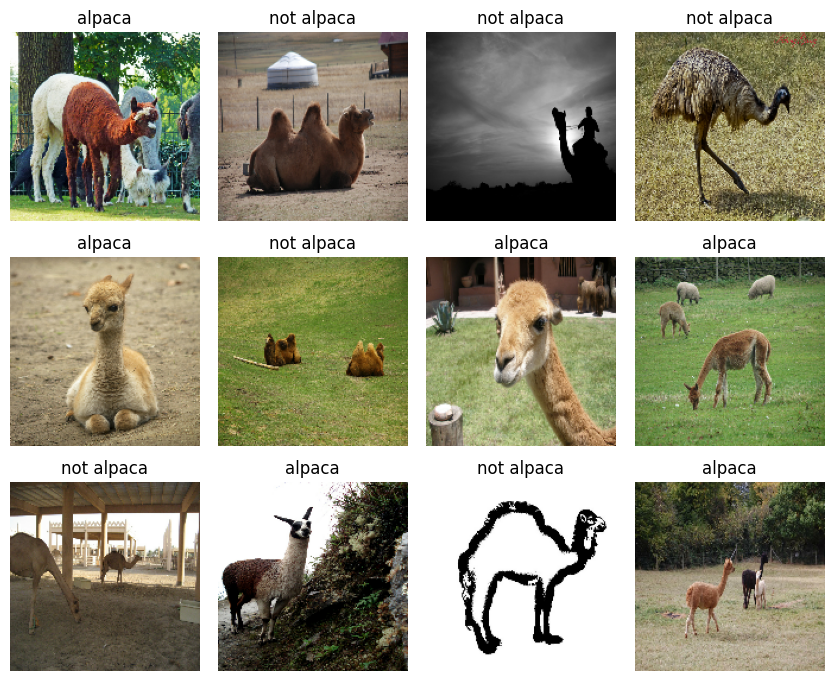

In [17]:
class_names = train_ds.class_names

fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(10.5, 8.5))
fig.subplots_adjust(wspace=0.1, hspace=0.1)

images, labels = next(iter(train_ds))
for i in range(12):
    a = ax.flat[i]
    a.imshow(images[i].numpy().astype("uint8"))
    a.set_title(class_names[labels[i]])
    a.set_axis_off()

plt.show()

In [18]:
# prefetch the training data
# see the corresponding documentation link at https://www.tensorflow.org/guide/data_performance for detail.
train_ds = train_ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

## Data augmentation

In [19]:
data_augmenter = tf.keras.Sequential([
    tfl.RandomFlip(mode="horizontal"),
    tfl.RandomRotation(factor=0.2)
])

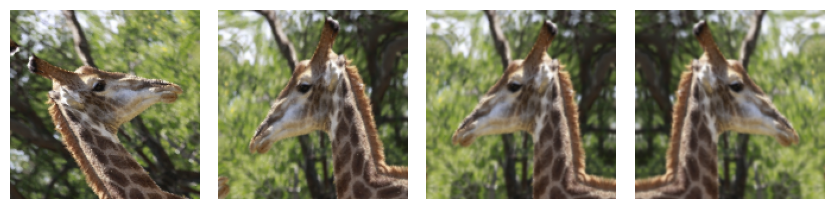

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(10.5, 2.5))
fig.subplots_adjust(wspace=0.1)

images, _ = next(iter(train_ds))
image = tf.expand_dims(images[0], 0)
for i in range(4):
    image = data_augmenter(image)
    a = ax.flat[i]
    a.imshow(image[0].numpy().astype("uint8"))
    a.set_axis_off()

plt.show()

# <span style="color:green"> MobileNetV2 </span>

In [22]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model = mobilenet.MobileNetV2(input_shape=IMG_SHAPE,
                                   include_top=True,
                                   weights='imagenet')

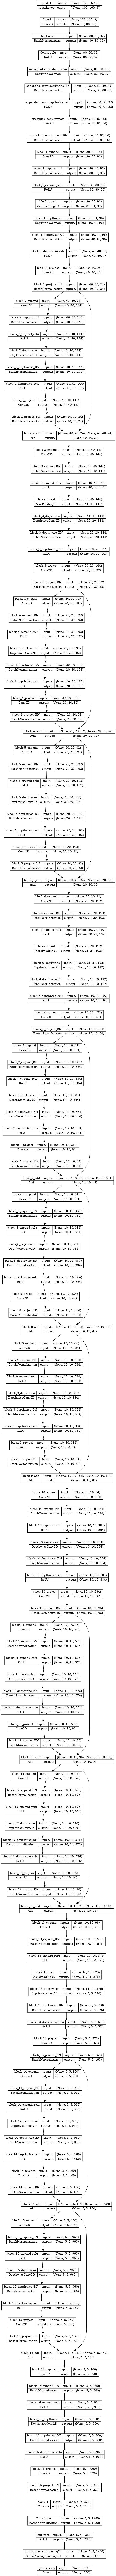

In [23]:
tf.keras.utils.plot_model(base_model, "MobileNetV2-Alpaca.png",show_shapes=True)

In [24]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 20, 20, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_depthwise_relu (ReLU)  (None, 20, 20, 144)  0           ['block_3_depthwise_BN[0][0]']   
                                                                                                  
 block_3_project (Conv2D)       (None, 20, 20, 32)   4608        ['block_3_depthwise_relu[0][0]'] 
                                                                                                  
 block_3_project_BN (BatchNorma  (None, 20, 20, 32)  128         ['block_3_project[0][0]']        
 lization)

 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 10, 10, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 10, 10, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)                                                                                            
                                                                                                  
 block_7_depthwise_BN (BatchNor  (None, 10, 10, 384)  1536       ['block_7_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_7_d

 block_10_project_BN (BatchNorm  (None, 10, 10, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 10, 10, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_expand_BN (BatchNorma  (None, 10, 10, 576)  2304       ['block_11_expand[0][0]']        
 lization)                                                                                        
                                                                                                  
 block_11_expand_relu (ReLU)    (None, 10, 10, 576)  0           ['block_11_expand_BN[0][0]']     
                                                                                                  
 block_11_

                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 5, 5, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 5, 5, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_project_BN (BatchNorm  (None, 5, 5, 160)   640         ['block_14_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_14_add (Add)             (None, 5, 5, 160)    0           ['block_13_project_BN[0][0]',    
                                                                  'block_14_project_BN[0][0]']    
          

## <span style="color:olive"> Full base_model </span>
We do this for a batch of training dataset.

In [25]:
base_model.trainable = False
image_batch, label_batch = next(iter(train_ds))
preds_batch = base_model(mobilenet.preprocess_input(image_batch))
print(preds_batch.shape)

(32, 1000)


In [26]:
mobilenet.decode_predictions(preds_batch.numpy(), top=2)

[[('n02437312', 'Arabian_camel', 0.25663653),
  ('n02422106', 'hartebeest', 0.121227264)],
 [('n02437616', 'llama', 0.82594573), ('n07802026', 'hay', 0.05262783)],
 [('n02133161', 'American_black_bear', 0.38891575),
  ('n02492660', 'howler_monkey', 0.10211125)],
 [('n02437312', 'Arabian_camel', 0.9491733),
  ('n02437616', 'llama', 0.002108783)],
 [('n04136333', 'sarong', 0.1135403), ('n04458633', 'totem_pole', 0.10245281)],
 [('n02437616', 'llama', 0.88763154), ('n02403003', 'ox', 0.019784829)],
 [('n02437616', 'llama', 0.9167497), ('n01518878', 'ostrich', 0.007613644)],
 [('n02437616', 'llama', 0.8639786),
  ('n02437312', 'Arabian_camel', 0.049981385)],
 [('n02437312', 'Arabian_camel', 0.9112966),
  ('n02444819', 'otter', 0.009152599)],
 [('n02093647', 'Bedlington_terrier', 0.4338762),
  ('n02113799', 'standard_poodle', 0.40693182)],
 [('n02102973', 'Irish_water_spaniel', 0.23756889),
  ('n02100877', 'Irish_setter', 0.19080351)],
 [('n01518878', 'ostrich', 0.76735544),
  ('n02092002',

**Note:** The base_model has been trained on imagenet dataset and has 1000 classes, and they are not concerned with Alpaca/Not Alpaca clasification. What we can do is
- Set include_top=False in base_model.
- Add a binary classifier layer.
- Freeze the base_model and train.

## <span style="color:olive"> base_model with a new classifier </span>

In [27]:
def alpaca_model():
    base_model = mobilenet.MobileNetV2(input_shape=IMG_SHAPE,
                                       include_top=False,
                                       weights='imagenet')
    
    base_model.trainable = False 
    inputs = tf.keras.Input(shape=IMG_SHAPE) 
    x = data_augmenter(inputs)
    x = mobilenet.preprocess_input(x) 
    x = base_model(x) 
    
    # new layers
    x = tfl.GlobalAveragePooling2D()(x)
    x = tfl.Dropout(rate=0.2)(x)
    outputs = tfl.Dense(units=1,activation='linear',name='binary_classification_layer')(x) 
    
    model = tf.keras.Model(inputs, outputs)
    
    return model

In [44]:
model = alpaca_model()
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 160, 160, 3)       0         
                                                                 
 tf.math.truediv_3 (TFOpLamb  (None, 160, 160, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_3 (TFOpLam  (None, 160, 160, 3)      0         
 bda)                                                            
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                           

In [45]:
base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [46]:
initial_epochs = 10
model.fit(train_ds, validation_data=valid_ds, epochs=initial_epochs, batch_size=32, verbose=2)

Epoch 1/10
9/9 - 4s - loss: 0.7455 - accuracy: 0.5420 - val_loss: 0.6631 - val_accuracy: 0.5077 - 4s/epoch - 435ms/step
Epoch 2/10
9/9 - 1s - loss: 0.6070 - accuracy: 0.6298 - val_loss: 0.5215 - val_accuracy: 0.6769 - 1s/epoch - 159ms/step
Epoch 3/10
9/9 - 1s - loss: 0.5180 - accuracy: 0.7023 - val_loss: 0.4316 - val_accuracy: 0.7385 - 1s/epoch - 167ms/step
Epoch 4/10
9/9 - 1s - loss: 0.4647 - accuracy: 0.7595 - val_loss: 0.4167 - val_accuracy: 0.6923 - 1s/epoch - 158ms/step
Epoch 5/10
9/9 - 1s - loss: 0.4264 - accuracy: 0.7863 - val_loss: 0.3484 - val_accuracy: 0.7846 - 1s/epoch - 159ms/step
Epoch 6/10
9/9 - 1s - loss: 0.3647 - accuracy: 0.8244 - val_loss: 0.3231 - val_accuracy: 0.7692 - 1s/epoch - 156ms/step
Epoch 7/10
9/9 - 1s - loss: 0.3495 - accuracy: 0.8435 - val_loss: 0.3206 - val_accuracy: 0.7538 - 1s/epoch - 164ms/step
Epoch 8/10
9/9 - 1s - loss: 0.3286 - accuracy: 0.8550 - val_loss: 0.2871 - val_accuracy: 0.8154 - 1s/epoch - 152ms/step
Epoch 9/10
9/9 - 1s - loss: 0.3124 - acc

**Note:** Good! But we can do much better by fine tuning the last few layers.

## <span style="color:olive"> fine tuning: make last few deep layers trainable </span>

In [47]:
model.layers[4].trainable = True # 4th layer is the base MobileNetV2 model

num_finetuned_layers = 35
num_layers = len(model.layers[4].layers)
for layer in model.layers[4].layers[:num_layers-num_finetuned_layers]:
    layer.trainable = False

model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 160, 160, 3)       0         
                                                                 
 tf.math.truediv_3 (TFOpLamb  (None, 160, 160, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_3 (TFOpLam  (None, 160, 160, 3)      0         
 bda)                                                            
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                           

In [48]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1*base_learning_rate),
               loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
               metrics=['accuracy'])

In [49]:
fine_tune_epochs = 10
total_epochs = initial_epochs + fine_tune_epochs
model.fit(train_ds, validation_data=valid_ds, epochs=total_epochs, initial_epoch=initial_epochs, batch_size=32, verbose=2)

Epoch 11/20
9/9 - 5s - loss: 0.4442 - accuracy: 0.8397 - val_loss: 0.1879 - val_accuracy: 0.9385 - 5s/epoch - 567ms/step
Epoch 12/20
9/9 - 2s - loss: 0.2580 - accuracy: 0.8969 - val_loss: 0.1763 - val_accuracy: 0.9538 - 2s/epoch - 192ms/step
Epoch 13/20
9/9 - 2s - loss: 0.1770 - accuracy: 0.9198 - val_loss: 0.1448 - val_accuracy: 0.9538 - 2s/epoch - 190ms/step
Epoch 14/20
9/9 - 2s - loss: 0.1602 - accuracy: 0.9275 - val_loss: 0.1306 - val_accuracy: 0.9846 - 2s/epoch - 190ms/step
Epoch 15/20
9/9 - 2s - loss: 0.1266 - accuracy: 0.9580 - val_loss: 0.1183 - val_accuracy: 0.9846 - 2s/epoch - 193ms/step
Epoch 16/20
9/9 - 2s - loss: 0.0962 - accuracy: 0.9733 - val_loss: 0.1244 - val_accuracy: 0.9846 - 2s/epoch - 191ms/step
Epoch 17/20
9/9 - 2s - loss: 0.0963 - accuracy: 0.9733 - val_loss: 0.1272 - val_accuracy: 0.9538 - 2s/epoch - 194ms/step
Epoch 18/20
9/9 - 2s - loss: 0.0798 - accuracy: 0.9809 - val_loss: 0.1863 - val_accuracy: 0.9385 - 2s/epoch - 190ms/step
Epoch 19/20
9/9 - 2s - loss: 0.0

# Test predictions

In [52]:
model.trainable = False
print(f"validation accuracy is {model.evaluate(valid_ds,verbose=0)[1]*100:.2f}%")

validation accuracy is 95.38%


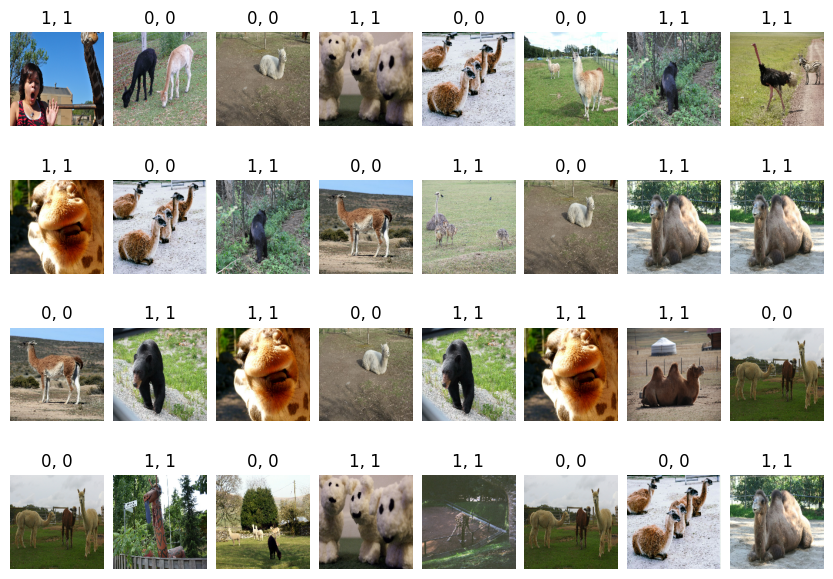

In [54]:
image_batch, label_batch = next(iter(train_ds))
preds_batch = model(image_batch).numpy()
probs_batch = tf.sigmoid(preds_batch).numpy()
yhat_batch = probs_batch>=0.5 # Note the data labels suggest that 0: alpaca, 1: not alpaca
yhat_batch_label = yhat_batch.astype("int64")
m = image_batch.shape[0]
fig, ax = plt.subplots(nrows=4, ncols=8, figsize=(10.5, 7.5))
fig.subplots_adjust(wspace=0.1, hspace=0.1)
for a in ax.flat:
    random_index = np.random.randint(m)
    a.imshow(image_batch[random_index].numpy().astype("uint8"))
    a.set_title(f"{label_batch[random_index]}, {yhat_batch_label[random_index][0]}")
    a.set_axis_off()

plt.show()